In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load the dataset
data = pd.read_csv('/content/tested.csv')


In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


In [34]:
len(data)

418

In [44]:
data.shape

(418, 11)

In [7]:
new_data=data[['Pclass','Sex','Age','Fare','Survived']]
new_data

,Pclass,Sex,Age,Fare,Survived
0,3,1,34.50000,7.8292,0
1,3,0,47.00000,7.0000,1
2,2,1,62.00000,9.6875,0
3,3,1,27.00000,8.6625,0
4,3,0,22.00000,12.2875,1
...,...,...,...,...,...
413,3,1,30.27259,8.0500,0
414,1,0,39.00000,108.9000,1
415,3,1,38.50000,7.2500,0
416,3,1,30.27259,8.0500,0


In [46]:
print (data.columns,'/n/n/n/n')
data.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object') /n/n/n/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [45]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
97,989,0,3,"Makinen, Mr. Kalle Edvard",1,29.00000,0,0,STON/O 2. 3101268,7.9250,2
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.00000,0,1,PC 17755,512.3292,0
146,1038,0,1,"Hilliard, Mr. Herbert Henry",1,30.27259,0,0,17463,51.8625,2
180,1072,0,2,"McCrie, Mr. James Matthew",1,30.00000,0,0,233478,13.0000,2
53,945,1,1,"Fortune, Miss. Ethel Flora",0,28.00000,3,2,19950,263.0000,2
321,1213,0,3,"Krekorian, Mr. Neshan",1,25.00000,0,0,2654,7.2292,0
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2
352,1244,0,2,"Dibden, Mr. William",1,18.00000,0,0,S.O.C. 14879,73.5000,2
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.00000,0,0,347086,7.7750,2
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.00000,0,0,7538,9.2250,2


In [49]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.401914
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [9]:
new_data1=new_data.dropna()
new_data1

,Pclass,Sex,Age,Fare,Survived
0,3,1,34.50000,7.8292,0
1,3,0,47.00000,7.0000,1
2,2,1,62.00000,9.6875,0
3,3,1,27.00000,8.6625,0
4,3,0,22.00000,12.2875,1
...,...,...,...,...,...
413,3,1,30.27259,8.0500,0
414,1,0,39.00000,108.9000,1
415,3,1,38.50000,7.2500,0
416,3,1,30.27259,8.0500,0


In [48]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2
417,1309,0,3,"Peter, Master. Michael J",1,30.27259,1,1,2668,22.3583,0


In [10]:
target=new_data1.Survived
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [11]:
inputs=new_data1.drop('Survived',axis='columns')
inputs


,Pclass,Sex,Age,Fare
0,3,1,34.50000,7.8292
1,3,0,47.00000,7.0000
2,2,1,62.00000,9.6875
3,3,1,27.00000,8.6625
4,3,0,22.00000,12.2875
...,...,...,...,...
413,3,1,30.27259,8.0500
414,1,0,39.00000,108.9000
415,3,1,38.50000,7.2500
416,3,1,30.27259,8.0500


In [12]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['Sex_n']= le_sex.fit_transform(inputs['Sex'])
inputs


,Pclass,Sex,Age,Fare,Sex_n
0,3,1,34.50000,7.8292,1
1,3,0,47.00000,7.0000,0
2,2,1,62.00000,9.6875,1
3,3,1,27.00000,8.6625,1
4,3,0,22.00000,12.2875,0
...,...,...,...,...,...
413,3,1,30.27259,8.0500,1
414,1,0,39.00000,108.9000,0
415,3,1,38.50000,7.2500,1
416,3,1,30.27259,8.0500,1


In [13]:
inputs_new=inputs.drop('Sex', axis='columns')
inputs_new

,Pclass,Age,Fare,Sex_n
0,3,34.50000,7.8292,1
1,3,47.00000,7.0000,0
2,2,62.00000,9.6875,1
3,3,27.00000,8.6625,1
4,3,22.00000,12.2875,0
...,...,...,...,...
413,3,30.27259,8.0500,1
414,1,39.00000,108.9000,0
415,3,38.50000,7.2500,1
416,3,30.27259,8.0500,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_new, target, test_size=0.1, random_state=42)
len(X_train)

376

In [15]:
len(y_test)

42

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
model_DecisionTree=tree.DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)
model_DecisionTree.score(X_test,y_test)

1.0

In [17]:
scores_DecisionTree=cross_val_score(tree.DecisionTreeClassifier(),X_train,y_train,cv=10)
scores_DecisionTree

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
scores_DecisionTree.mean()

1.0

In [19]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.5476190476190477

In [20]:
scores_svm=cross_val_score(SVC(),X_train,y_train,cv=10)
scores_svm

array([0.65789474, 0.68421053, 0.68421053, 0.68421053, 0.63157895,
       0.63157895, 0.62162162, 0.64864865, 0.62162162, 0.64864865])

In [21]:
scores_svm.mean()

0.6514224751066855

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier(n_estimators=500)
model_RandomForest.fit(X_train,y_train)
model_RandomForest.score(X_test,y_test)

1.0

In [23]:
scores_RandomForest=cross_val_score(RandomForestClassifier(n_estimators=500),X_train,y_train,cv=10)
scores_RandomForest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
scores_RandomForest.mean()

1.0

In [25]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(X_train,y_train)
model_LogisticRegression.score(X_test,y_test)

1.0

In [26]:
scores_LogisticRegression=cross_val_score(LogisticRegression(),X_train,y_train,cv=10)
scores_LogisticRegression

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
scores_LogisticRegression.mean()

1.0

In [28]:
predictions = model_RandomForest.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [29]:
y_test

321    0
324    1
388    0
56     0
153    1
30     0
72     1
82     0
258    1
416    0
9      0
391    1
104    1
414    1
413    0
39     0
412    1
378    0
55     0
406    0
387    0
245    0
409    1
180    0
225    1
113    1
364    1
148    0
337    0
78     0
210    0
367    1
141    1
93     0
222    1
204    0
79     1
301    0
248    1
75     0
70     1
33     1
Name: Survived, dtype: int64

In [30]:
import tensorflow as tf
from tensorflow import keras

#I will create a neural network
#I will have same number of neurons as columns, so 2
#we use relu as activation function because is easy to compute relu

model=keras.Sequential([
    keras.layers.Dense(4,input_shape=(4,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

#loss is binary_crossentropy because our output is binary, zero and one
#adam is a very commonly used optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
epochs = 200
history = model.fit(
    X_train,
    y_train,
    epochs=epochs
)

Epoch 1/200
12/12 [==============================] - 1s 4ms/step - loss: 1.7049 - accuracy: 0.3511
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 1.4073 - accuracy: 0.3431
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 1.1762 - accuracy: 0.3484
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.9914 - accuracy: 0.3457
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.8640 - accuracy: 0.3511
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 0.7832 - accuracy: 0.3537
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.3883
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.6144
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.6383
Epoch 10/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6330
Epoch 11/

In [33]:
epochs = 200
history = model.fit(
    X_test,
    y_test,
    epochs=epochs
)

Epoch 1/200
2/2 [==============================] - 0s 13ms/step - loss: 0.6509 - accuracy: 0.5952
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.5952
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6498 - accuracy: 0.5952
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6489 - accuracy: 0.5952
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6483 - accuracy: 0.5952
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6474 - accuracy: 0.5952
Epoch 7/200
2/2 [==============================] - 0s 17ms/step - loss: 0.6465 - accuracy: 0.5952
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6461 - accuracy: 0.5952
Epoch 9/200
2/2 [==============================] - 0s 14ms/step - loss: 0.6453 - accuracy: 0.5952
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.5952
Epoch 11/200
2/2 [========

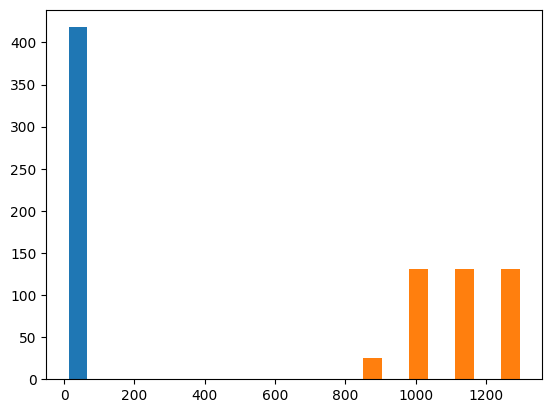

In [52]:
import matplotlib.pyplot as plt
plt.hist(data[['Survived','PassengerId']]);

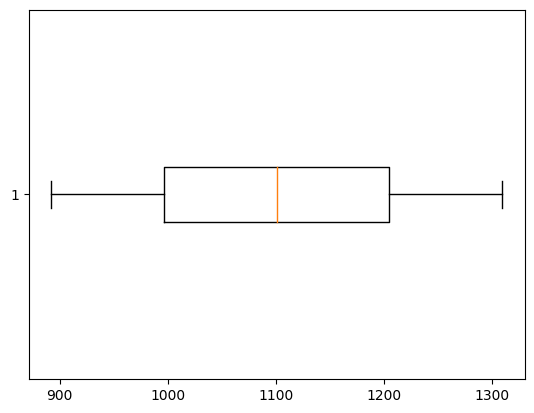

In [53]:
plt.boxplot(data['PassengerId'],vert=False);

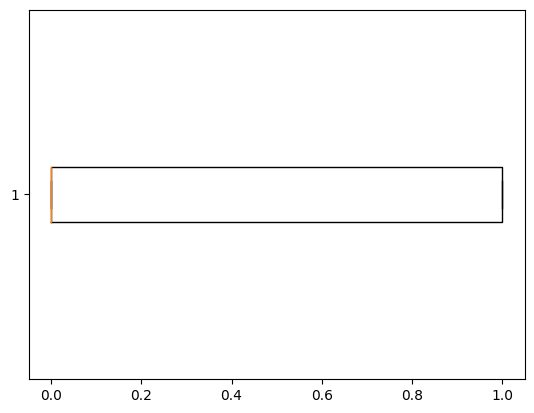

In [54]:
plt.boxplot(data['Survived'],vert=False);

In [55]:
data['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [58]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [61]:
!pip install plotly
import plotly.express as px

pclass_counts=data.Pclass.value_counts()
fig_pclass_perc=px.pie(data,names=pclass_counts.index,values=pclass_counts.values,title=f'Distribution of Pclass')

fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:',legend=dict(orientation="h",yanchor="bottom",y=1.02))
fig_pclass_perc.show()


In [71]:
#0=male 1= female
ig_pclass_surv=px.histogram(data,x='Pclass',barmode='group',color='Survived')
fig_pclass_surv.update_layout(title='Survival according to passenger classes',plot_bgcolor='pink')
fig_pclass_surv.show()


In [72]:
fig_pclass_surv=px.histogram(data,x='Sex',barmode='group',color='Survived')
fig_pclass_surv.update_layout(title='Survival according to gender',plot_bgcolor='lightblue')
fig_pclass_surv.show()


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/tested.csv")

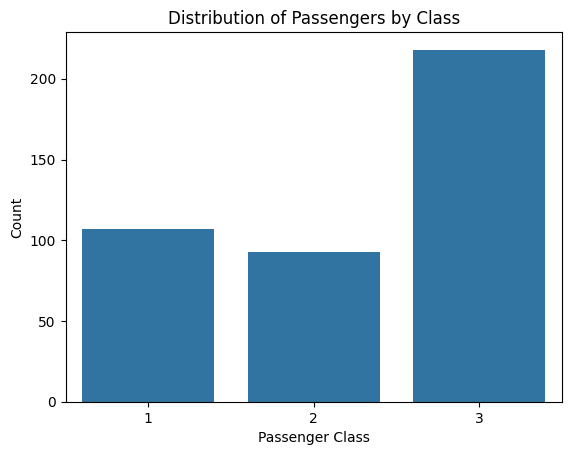

In [14]:
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

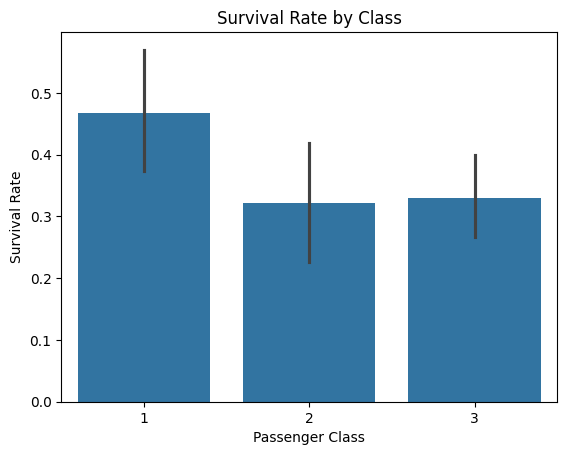

In [15]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

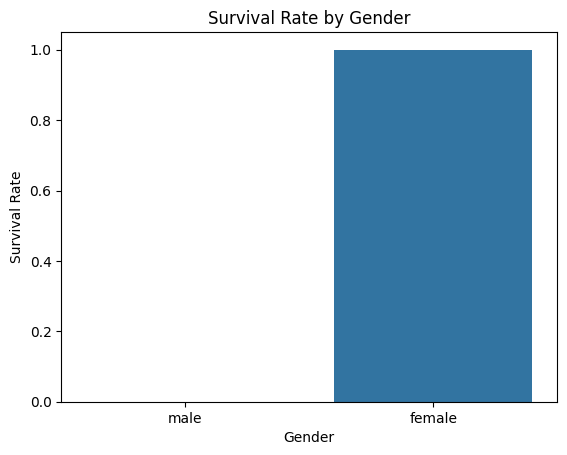

In [16]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

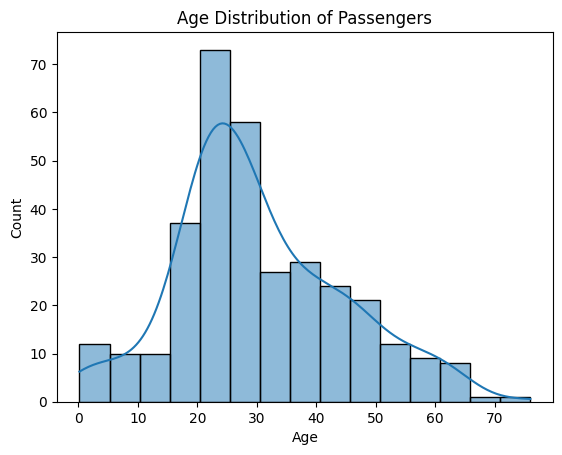

In [17]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

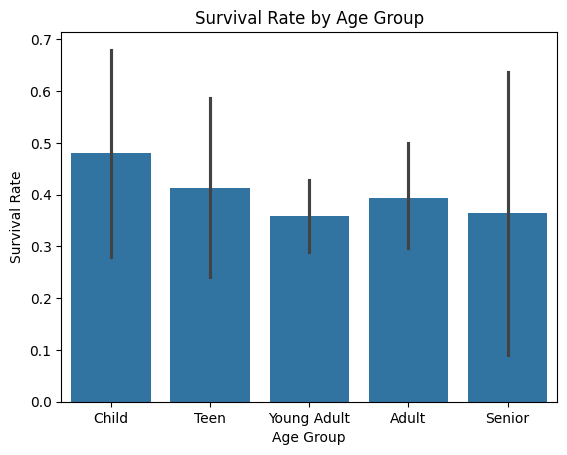

In [18]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(data=df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

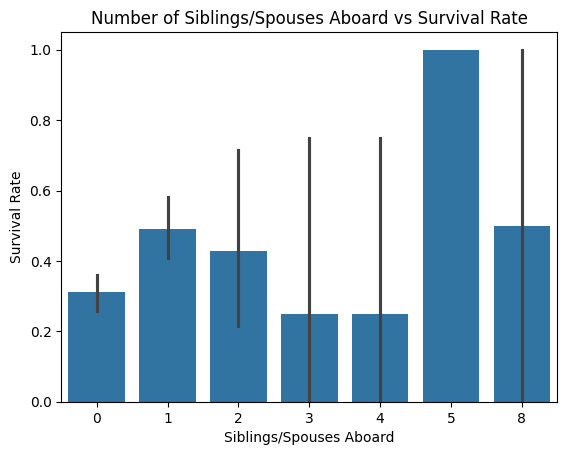

In [19]:
sns.barplot(data=df, x='SibSp', y='Survived')
plt.title('Number of Siblings/Spouses Aboard vs Survival Rate')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

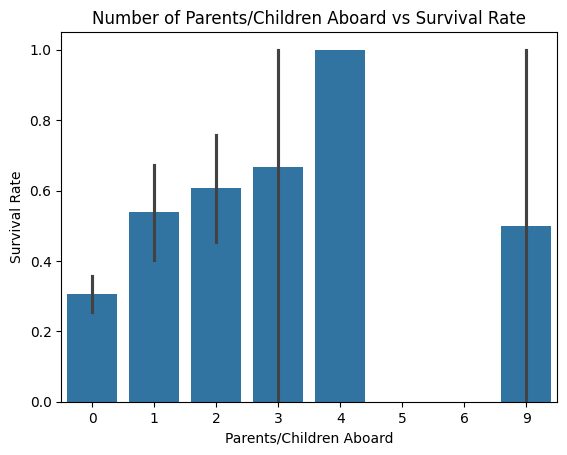

In [20]:
sns.barplot(data=df, x='Parch', y='Survived')
plt.title('Number of Parents/Children Aboard vs Survival Rate')
plt.xlabel('Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

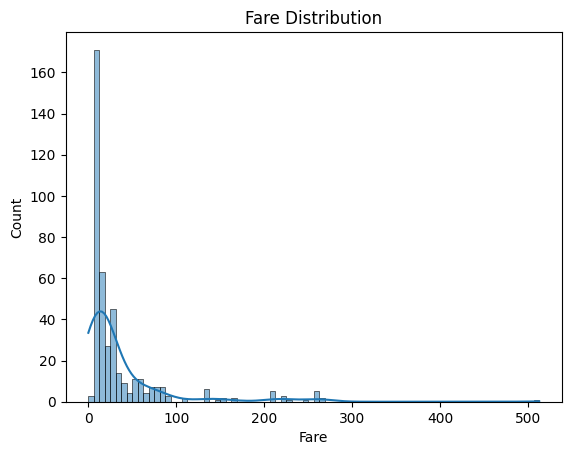

In [21]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

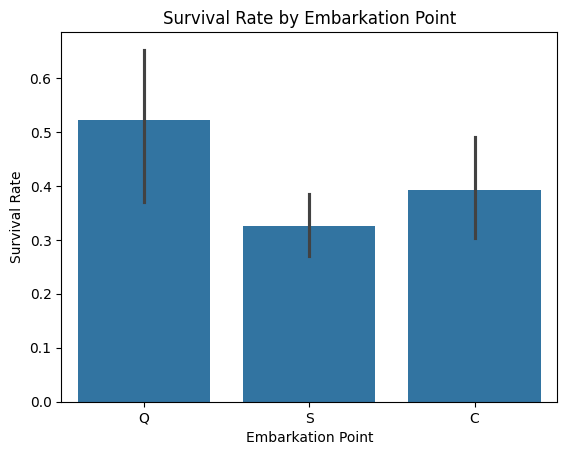

In [22]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

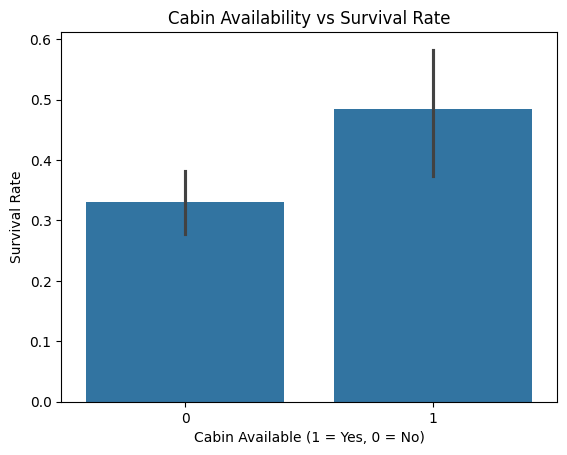

In [23]:
df['CabinAvailable'] = df['Cabin'].notna().astype(int)
sns.barplot(data=df, x='CabinAvailable', y='Survived')
plt.title('Cabin Availability vs Survival Rate')
plt.xlabel('Cabin Available (1 = Yes, 0 = No)')
plt.ylabel('Survival Rate')
plt.show()